In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Activation, Dropout

from numpy import newaxis


Using TensorFlow backend.


In [7]:
%run pathtodata.py
file_path = os.path.join(pathtodata(), 'poloniex_usdt_pairs.csv')
pdf = pd.read_csv(file_path)



/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
pdf.head()
#new_df = pd.DataFrame(pdf[80000:])
#new_df = pdf.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
#new_df.head()

,Unnamed: 0,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,NaN,quoteVolume,volume,price,quoteVolume,volume,price,quoteVolume,volume,price,...,price,quoteVolume,volume,price,quoteVolume,volume,price,quoteVolume,volume,price
1,2017-01-01 00:00:00,5.59672254,5398.83711674,964.64262399,1569.50520479,10.17706057,0.0064842400000000005,NaN,NaN,NaN,...,48.03006375,0.31177786,3.53187151,11.32816651,0.0,0.0,0.0058979900000000005,4.4515247,16.99118095,3.81693511
2,2017-01-01 00:05:00,0.0872821,84.30211763,965.85803538,0.0,0.0,0.00648653,NaN,NaN,NaN,...,47.99598877,0.0,0.0,11.34,3.74928786,0.02214978,0.00590773,0.6274922900000001,2.40788429,3.8373129500000003
3,2017-01-01 00:10:00,2.73736768,2638.6761714,963.94656468,0.0,0.0,0.00648653,NaN,NaN,NaN,...,47.87084582,0.0,0.0,11.34,0.0,0.0,0.00590773,0.0,0.0,3.8373129500000003
4,2017-01-01 00:15:00,3.55008694,3415.27230881,962.02497756,0.0,0.0,0.00648653,NaN,NaN,NaN,...,47.87084582,0.02109787,0.23851219,11.30503661,0.0,0.0,0.00590773,0.0,0.0,3.8373129500000003


In [25]:
pdf = pd.read_csv('poloniex_usdt_pairs.csv')
new_df = pd.DataFrame(pdf[1:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
new_df.head()

/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,USDT_ETH,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,5.596723,5398.837117,964.642624,1569.505205,10.177061,0.006484,NaN,NaN,NaN,10.829825,...,48.030064,0.311778,3.531872,11.328167,0.000000,0.00000,0.005898,4.451525,16.991181,3.816935
1,0.087282,84.302118,965.858035,0.000000,0.000000,0.006487,NaN,NaN,NaN,1.905818,...,47.995989,0.000000,0.000000,11.340000,3.749288,0.02215,0.005908,0.627492,2.407884,3.837313
2,2.737368,2638.676171,963.946565,0.000000,0.000000,0.006487,NaN,NaN,NaN,52.238724,...,47.870846,0.000000,0.000000,11.340000,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
3,3.550087,3415.272309,962.024978,0.000000,0.000000,0.006487,NaN,NaN,NaN,71.031741,...,47.870846,0.021098,0.238512,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
4,0.083323,80.287691,963.568648,0.000000,0.000000,0.006487,NaN,NaN,NaN,2.364352,...,48.130523,0.000000,0.000000,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313


In [26]:
#USDT_BCH has too many NAN value, so I get rid all of them
#we may want to use part of the data to see any further improvement
df1=new_df.drop({'USDT_BCH','USDT_BCH.1','USDT_BCH.2'},axis=1)
df1.head()

,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_ETH,USDT_ETH.1,USDT_ETH.2,USDT_LTC,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,5.596723,5398.837117,964.642624,1569.505205,10.177061,0.006484,10.829825,87.204495,8.052253,0.000000,...,48.030064,0.311778,3.531872,11.328167,0.000000,0.00000,0.005898,4.451525,16.991181,3.816935
1,0.087282,84.302118,965.858035,0.000000,0.000000,0.006487,1.905818,15.430150,8.096340,3.488528,...,47.995989,0.000000,0.000000,11.340000,3.749288,0.02215,0.005908,0.627492,2.407884,3.837313
2,2.737368,2638.676171,963.946565,0.000000,0.000000,0.006487,52.238724,424.651523,8.129056,0.022954,...,47.870846,0.000000,0.000000,11.340000,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
3,3.550087,3415.272309,962.024978,0.000000,0.000000,0.006487,71.031741,581.842210,8.191299,0.001006,...,47.870846,0.021098,0.238512,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313
4,0.083323,80.287691,963.568648,0.000000,0.000000,0.006487,2.364352,19.389736,8.200868,15.142531,...,48.130523,0.000000,0.000000,11.305037,0.000000,0.00000,0.005908,0.000000,0.000000,3.837313


In [27]:
#get rid of NAN values in the last 3 lines. 
df1=df1[:-3]
df1.isnull().sum()

USDT_BTC       0
USDT_BTC.1     0
USDT_BTC.2     0
USDT_XRP       0
USDT_XRP.1     0
USDT_XRP.2     0
USDT_ETH       0
USDT_ETH.1     0
USDT_ETH.2     0
USDT_LTC       0
USDT_LTC.1     0
USDT_LTC.2     0
USDT_ETC       0
USDT_ETC.1     0
USDT_ETC.2     0
USDT_STR       0
USDT_STR.1     0
USDT_STR.2     0
USDT_XMR       0
USDT_XMR.1     0
USDT_XMR.2     0
USDT_ZEC       0
USDT_ZEC.1     0
USDT_ZEC.2     0
USDT_DASH      0
USDT_DASH.1    0
USDT_DASH.2    0
USDT_NXT       0
USDT_NXT.1     0
USDT_NXT.2     0
USDT_REP       0
USDT_REP.1     0
USDT_REP.2     0
dtype: int64

In [28]:
x=df1.iloc[:,2:3]
x.head()


,USDT_BTC.2
0,964.642624
1,965.858035
2,963.946565
3,962.024978
4,963.568648


In [29]:
y=df1.iloc[1:,2:3]
#y.head()
y = y.apply(lambda x: pd.Series([float(i) for i in x]))
y.head()

,USDT_BTC.2
0,965.858035
1,963.946565
2,962.024978
3,963.568648
4,965.356982


In [30]:
data_to_use=1000
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use

train_end


800

In [31]:
scaler=MinMaxScaler(feature_range=(0,1))
#x=np.array(x).reshape((len(x),3))
x=scaler.fit_transform(x)

#scaler_y=MinMaxScaler(feature_range=(0,1))
#y=np.array(y).reshape((len(y),1))
y=scaler.fit_transform(y)

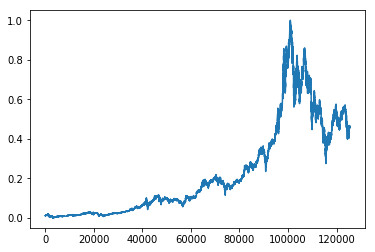

In [32]:
plt.plot(y)

In [33]:
x_train=np.array(x[0:train_end])
y_train=np.array(y[0:train_end])
x_test=np.array(x[train_end+1:data_to_use+1])
y_test=np.array(y[train_end+1:data_to_use+1])

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(800, 1) (200, 1)
(800, 1) (200, 1)


In [34]:
#print (x_train)
#print('x'*20)
#print(y_train)

In [35]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
#y_train=np.reshape(y_train,(y_train.shape[0],1,y_train.shape[1]))
#y_test=np.reshape(y_test,(y_test.shape[0],1,y_test.shape[1]))


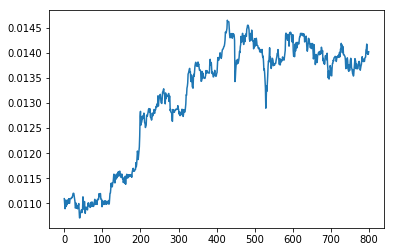

In [36]:
plt.plot(y_train)

In [37]:
model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model=Sequential()
model.add(LSTM(12,input_shape=(1,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1,activation='linear'))
#model.add(Dense(1))

/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  import sys


In [17]:
y_train[:,0].shape


(800,)

In [38]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,batch_size=80,nb_epoch=10,validation_split=0.1,shuffle=False)

/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected dense_2_input to have 2 dimensions, but got array with shape (800, 1, 1)

In [19]:
trainpredict=model.predict(x_train)
testpredict=model.predict(x_test)



In [20]:
#y_train

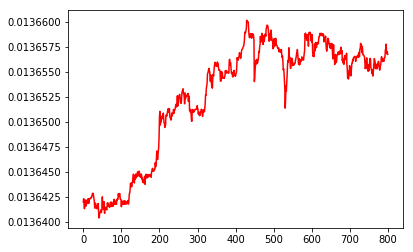

In [21]:
plt.plot(trainpredict, color='red')
#plt.plot(y_train,color='blue')

In [137]:
#print(trainpredict)
#print('*'*20)
#print(y_train)

In [129]:
trainpredict=trainpredict.reshape(len(trainpredict),1)
#trainpredict

In [130]:
y_test.shape

(200, 1)

In [133]:
testpredict=testpredict.reshape(len(testpredict),1)
y_test=y_test.reshape(len(y_test),1)
y_train=y_train.reshape(len(y_train),1)

trainpredict=scaler.inverse_transform(trainpredict)
testpredict=scaler.inverse_transform(testpredict)

y_test=scaler.inverse_transform(y_test)
y_train=scaler.inverse_transform(y_train)

#print (testpredict)
#print('*'*20)
#print(y_test)

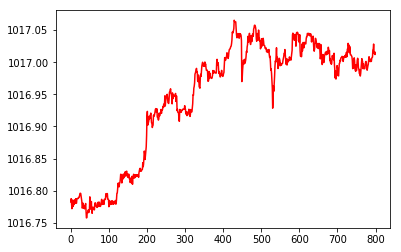

In [135]:
plt.plot(trainpredict, color='red')
#plt.plot(y_train,color='blue')

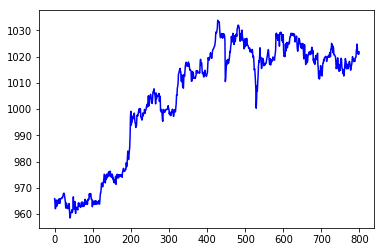

In [136]:
plt.plot(y_train,color='blue')